# Understanding Race and Crime in the US

## Introduction

I originally made a few graphs at the onset of the 2020 riots to show the disparity of police-caused death between racial demographics. This got segued into a conversation I had over twitter about a random non sequiter / "observation" that warranted further exploration. The claim is that when normalizing by violent crime arrests, deaths from police shootings (i.e. people killed by the police) appear to be skewed towards white folk. Meaning, more white people die from police shootings than black people, if you consider the proportion of white people arrested for violent crime vs black people. For the sake of clarity, we will call this metric the "**burden of risk**" or "**risk burden**" and define it as:

$$\textrm{Risk Burden} = \frac{i_\textrm{shot to death by police}}{j_\textrm{arrests}}$$

where $i$ and $j$ belong to the same demographic group.

That is to say, the claim is white people cary the burden of risk (their rate is higher) when $j = \textrm{violent crime}$, per this metric.

They calculated a ratio of 4:10,000 (killed:arrested) for the white population and 3:10,000 for the black population; citing [2018 FBI Uniform Crime Reporting data](https://ucr.fbi.gov/crime-in-the-u.s/2018/crime-in-the-u.s.-2018/tables/table-43) and [the 2018 Washington Post police shootings figures](https://www.washingtonpost.com/graphics/2018/national/police-shootings-2018/).

Seems pretty straight forward to verify.

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def barChart(ys, cats, colors, ticks=None, ylog=False, tight=True, rotation=0):
    n = len(ys[0])
    ind = np.arange(n)
    width = 0.3
    fig, ax = plt.subplots()
    fig.set_figheight(5)
    if len(ys) > 1:
        ax.bar(ind - width/2, ys[0], width, label=cats[0], color=colors[0])
        ax.bar(ind + width/2, ys[1], width, label=cats[1], color=colors[1])
    else:
        ax.bar(ind, ys[0], width, label=cats[0], color=colors[0])
    if ticks:
        ax.set_xticks(ind)
        ax.set_xticklabels(ticks, fontsize=10)
        ax.tick_params(axis='x', rotation=rotation)
    else:
        plt.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
    if ylog:
        plt.yscale('log')
        
    plt.legend()
    
    if tight:
        plt.tight_layout()
    return fig, ax

def stackChart(ys, cats, colors, ticks=None, ylog=False, tight=True,
               hline=[0.5], vline=None, rotation=0):
    n = len(ys[0])
    ind = np.arange(n)
    width = 0.3
    fig, ax = plt.subplots()
    fig.set_figheight(5)
    ax.stackplot(ind, ys[0], ys[1], labels=cats, colors=colors)
    
    if hline:
        for h in hline:
            ax.axhline(h, color='k', linestyle=":", alpha=0.5)
    if vline:
        for v in vline:
            ax.axvline(v, color='k', linestyle="--", alpha=0.5)
    
    if ticks:
        ax.set_xticks(ind)
        ax.set_xticklabels(ticks, fontsize=10)
        ax.tick_params(axis='x', rotation=rotation)
    else:
        plt.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
    if ylog:
        plt.yscale('log')
    
    plt.legend()
    
    if tight:
        plt.tight_layout()
    return fig, ax

dtypes = {
    'Offense': str,
    'Total': float,
    'White': float,
    'Black': float,
    'Hispanic': float
}

arrests = pd.read_csv('arrests_race_2018.csv', index_col='Offense', dtype=dtypes)
deaths = pd.DataFrame({'Total': [990], 'White': [456], 'Black': [228], 'Hispanic': [165]})
catagories = ['White', 'Black']
colors = ['green', 'purple', 'black']

Here I'm bringing in the data from the sources (feel free to varify the numbers if you'd like) into a data structure I can readily work with.

## Data Exploration

Let's print out the values...

### 2018 Police Shootings

In [2]:
deaths

,Total,White,Black,Hispanic
0,990,456,228,165


### 2018 Violent Crime

In [3]:
arrests.loc[['violentCrime']]

,Total,White,Black,Hispanic
Offense,,,,
violentCrime,392562.0,230299.0,146734.0,83441.0


### Examination

First lets verify the math for the ratios specified above. It's simply deaths/arrests:

In [4]:
w_rate = float(deaths['White'] / arrests.at['violentCrime', 'White'])
b_rate = float(deaths['Black'] / arrests.at['violentCrime', 'Black'])

print("W_Rate:\t{}".format(w_rate))
print("B_Rate:\t{}".format(b_rate))

W_Rate:	0.0019800346506063855
B_Rate:	0.001553832104352093


Immediately we can see the burden of risk for white people is actually closer to 2:1,000 and not 3:10,000. In other words, much worse than originally claimed. However, note the burden rate for black people is nearly 2:1,000 as well. Only a 0.000426 difference (that's 21.5% less).

Now, you can go and hyperbolize this to say that white people are ~22% more likely to be killed by police shooting than black people are (when normalized by violent crime arrests), but I wanted to show you the decimal value of the difference to quantify what that ~22% difference is. It's a difference of **less than half a person**, such that if you rounded by the significant digits the shooting rate would be **indiferentiable**.

### Issues with this Burden metric

I keep bringing up that we are normalizing by the number violent crime arrests specifically because I take personal issue with it's use. Firstly, the number of people **arrested** for violent crime is not the same as the violent crime **rate** -- which is what seems to be implied here. The crime rate is always a function of the population, describing how much crime there is based on the amount of people occupying a space. The overall number of arrests doesn't make this distinction, and in fact it was specifically chosen by the source of the conversation **specifically** because it avoided population sizes.

This was a metric cherrypicked to use **against** the traditional "normalization by demographic population" approach -- wherien you consider the relative size of the demographic's population when you look at the proportion of that population that gets arrested or killed by the police.

Secondly, it's being used as a proxy to compare demographics arrested for a crime to those that are shot by police, when those two metrics have a tenuous relationship with each other. Chiefly, a person shot to death by the police isn't being arrested... so normalizing police deaths by police arrests seems an aweful lot like presupposing they are highly correlated when we can think of any number of edge-cases that would prove this presupposition false -- can you think of more than one instance where a police officer killed someone that wasn't commiting a **violent crime** (i.e. any crime that isn't murder and nonneglegint manslaughter, rape, robbery or aggrivated assault)? How about any instances of a police officer killing someone that wasn't committing **any** crime? As sad as it is, those incidents still happen and it isn't being controlled for.

What is the accidental death rate amongst police shootings of suspects? The orignal claimant doesn't make a distinction.

### Going Deeper...

So, on the face of it, it looks like we have a metric that supports white people being killed by the police more than black people (figure below).

But, as I mentioned parenthetically before, violent crime is a category of several crimes. So what if we did the same analysis on each of those crimes to see why white people have a ~22% higher "risk burden" per violent crime arrest.

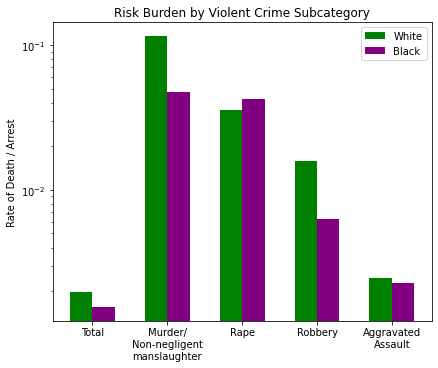

In [5]:
vals = ['violentCrime', 'murder', 'rape', 'robbery', 'aggravatedAssault']
labels = ['Total', 'Murder/\nNon-negligent\nmanslaughter', 'Rape',
          'Robbery', 'Aggravated\nAssault']

w_y = [float(deaths['White'] / arrests.at[i, 'White']) for i in vals]
b_y = [float(deaths['Black'] / arrests.at[i, 'Black']) for i in vals]

fig_violent, a = barChart([w_y, b_y], catagories, colors, ylog=True, ticks=labels)
_ = a.set_title('Risk Burden by Violent Crime Subcategory')
_ = a.set_ylabel('Rate of Death / Arrest')

Here are all the categories of violent crime broken down, with 'Total' on the left representing the whole the others on the right. The relationship disparity appears to be greatest in two places: Murder and Robbery. The other two crimes (Rape and Assault) are much closer, so it must be the two with the greatest difference that contributes to the ~22% difference we noted in the total.

Let's look at the arrest populations of those two crimes:

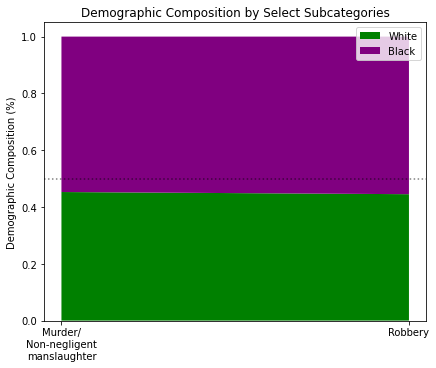

In [6]:
vals = ['murder', 'robbery']
labels = ['Murder/\nNon-negligent\nmanslaughter', 'Robbery']

w_y = [float(arrests.at[i, 'White'] / sum([arrests.at[i, 'White'],
                                           arrests.at[i, 'Black']])) for i in vals]
b_y = [float(arrests.at[i, 'Black'] / sum([arrests.at[i, 'White'],
                                           arrests.at[i, 'Black']])) for i in vals]

mr, a = stackChart([w_y, b_y], catagories, colors, ticks=labels)
_ = a.set_title('Demographic Composition by Select Subcategories')
_ = a.set_ylabel('Demographic Composition (%)')

What I did here was look at the demographic composition of arrests as a percentage between white and black groups. I simply asked, "Given the total number of white and black people arrested for murder or robbery, what percentage were white and what percentage were black?"

So it appears the reason the disparity exists is due to the fact that there are more total black people arrested for murder and robbery than total white people. Combined with the fact there are more total police killings of white people than total police killings of black people, the disparity shows itself.

But what about the other violent crime areas? Which demographic makes up the most of those arrests?

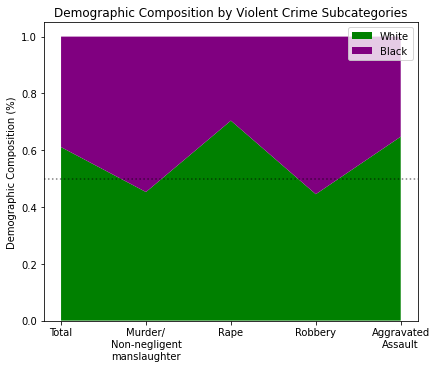

In [7]:
vals = ['violentCrime', 'murder', 'rape', 'robbery', 'aggravatedAssault']
labels = ['Total', 'Murder/\nNon-negligent\nmanslaughter', 'Rape',
          'Robbery', 'Aggravated\nAssault']

w_y = [float(arrests.at[i, 'White'] / sum([arrests.at[i, 'White'],
                                           arrests.at[i, 'Black']])) for i in vals]
b_y = [float(arrests.at[i, 'Black'] / sum([arrests.at[i, 'White'],
                                           arrests.at[i, 'Black']])) for i in vals]

mr, a = stackChart([w_y, b_y], catagories, colors, ticks=labels)
_ = a.set_title('Demographic Composition by Violent Crime Subcategories')
_ = a.set_ylabel('Demographic Composition (%)')

So it seems that Murder and Robbery are where the arrested black population takes the majority (by ~5pts) while Rape and Assault have a white majority by +20pts and +14pts respectively. Let's bring back the Deaths per Violent Crime chart:

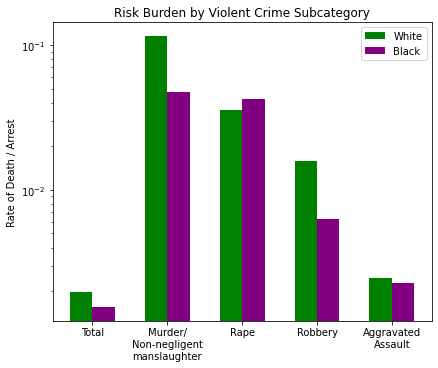

In [8]:
fig_violent

Some observations:

* Murder: 54% black by arrested population, but more white people are killed by ratio in this category
* Rape: 70% white by arrested population, but more black people are killed by ratio
* Robbery: 55% black by arresed population, but more white people are killed by ratio
* Assault: 64% white by arrested population, but more white people (by a very small margin) are killed by ratio.

This begs the question: why is it that, given a crime, if a black demographic is in **marginal** majority that crime is deadlier for a **white** person, but if a white demographic is the **CLEAR** majority of that crime it is unclear which group would be at higher risk?

Hint: It has to do with the number of white people killed by the police. What happens if we change it?

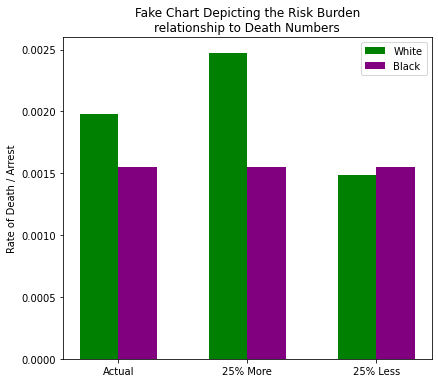

In [9]:
w_r = float(deaths['White'])
rates = [0, w_r * 0.25, -(w_r * 0.25) ]
labels = ['Actual', '25% More', '25% Less']

w_y = [(w_r + i) / arrests.at['violentCrime', 'White'] for i in rates]
b_y = [float(deaths['Black'] / arrests.at['violentCrime', 'Black'])] * 3

fig_fake, a = barChart([w_y, b_y], catagories, colors, ticks=labels)
_ = a.set_title('Fake Chart Depicting the Risk Burden\nrelationship to Death Numbers')
_ = a.set_ylabel('Rate of Death / Arrest')

What you're looking at is a comparison of two experiments:
1. What would happen if the number of white people killed by the police was increased by 25%?
2. What would happen if the number of white people killed by the police was dropped by 25%?

All the while we kept the number of black people killed by police constant. What do we see?
* The current insinuation wherein white people "are ~22% more likely to be killed by police"
* An alternate reality wherin white people "are ~37% more likely to be killed by police"
* An alternate reality wherein black people "are ~4% more likely to be killed by police"

I didn't show the math there for brevity, but those are just percent difference calculations between each demographic given each scenario. And if we look at the percent change between the actual and the two hypotheticals, you'll notice that the "risk burden" not only changed proportionately, but equally to the amount we changed the death numbers:

|   |Before| 25% More | 25% Less |
| - | -    | -        | -        |
|$\textbf{Values}$ | 0.00198 | 0.00248 | 0.00149 |
|$\textbf{Deltas}$ | 0 | 25.000000000000018 | 24.999999999999993 | 

>Yes, but these are made up. Why do made up numbers matter? Why is any of this important?

Because it illustrates the biggest factor (or variable that makes the biggest difference) in the "risk burden" metric is the amount of deaths cause by police shooting. If you recall, the <u>number of white poeple shot to death by the police is twice as big as the number of black people killed by police</u> -- because there are more white people.

Look at the demographics responsible for all crimes:

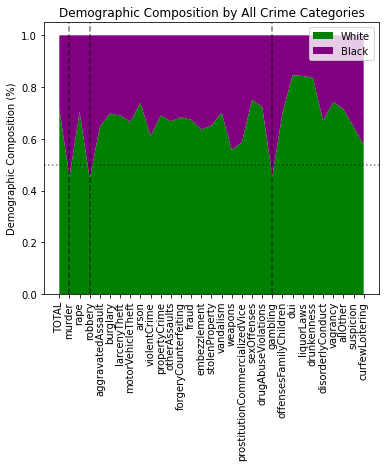

In [10]:
labels = list(arrests.index)

w_y = [float(arrests.at[i, 'White'] / sum([arrests.at[i, 'White'],
                                           arrests.at[i, 'Black']])) for i in labels]
b_y = [float(arrests.at[i, 'Black'] / sum([arrests.at[i, 'White'],
                                           arrests.at[i, 'Black']])) for i in labels]
vlines = [i for i in range(0, len(b_y)) if b_y[i] > 0.5]

pop, a = stackChart([w_y, b_y], catagories, colors, ticks=labels, rotation=90, vline=vlines, tight=False)
_ = a.set_title('Demographic Composition by All Crime Categories')
_ = a.set_ylabel('Demographic Composition (%)')

Only three crimes have a black majority (of ~5pts or less, mind you):
* Murder
* Robbery
* Gambling

Recall when I said violent crime is a grouping of 4 other crimes. How many of the 3 crimes with with a black majority demographic are amongst those 4 violent crimes? (the answer is 2)

It's almost like the original author of the risk burden metric was deliberately picking a set of crimes where >50% of the demographic population is black, to take advantage of the fact that black deaths are 50% that of white deaths. 🧐🤔

Convenient, no?

That's why I suggest we not stop at violent deaths, but to further calculate the risk burden of **every** crime recorded in the FBI dataset:

In [11]:
labels = list(arrests.index)

w_y = {k: float(deaths['White'] / arrests.at[k, 'White']) for k in labels}
b_y = {k: float(deaths['Black'] / arrests.at[k, 'Black']) for k in labels}

burden = pd.DataFrame()
burden['Offense'] = arrests.index
burden['White'] = burden['Offense'].map(w_y)
burden['Black'] = burden['Offense'].map(b_y)

def highlight_greater(x):
    c = 'background-color: orange'
    m1 = x['White'] > x['Black']
    m2 = x['Black'] > x['White']
    df1 = pd.DataFrame('', index=x.index, columns=x.columns)
    df1.loc[m1, 'White'] = c
    df1.loc[m2, 'Black'] = c
    return df1

burden.style.apply(highlight_greater, axis=None)

,Offense,White,Black
0,TOTAL,0.000086,0.000108
1,murder,0.115355,0.047719
2,rape,0.035642,0.042411
3,robbery,0.015711,0.006301
4,aggravatedAssault,0.002471,0.002271
5,burglary,0.004979,0.005755
6,larcenyTheft,0.001017,0.001134
7,motorVehicleTheft,0.010244,0.010222
8,arson,0.092345,0.131034
9,violentCrime,0.001980,0.001554


In 19 of the 31 categories of crime being tracked, black people have the highest risk burden, even when the crime isn't violent and when white people make up the preponderance of the arrested population for that crime.

In fact, let's look at the data in two dimensions, in terms of demographic composition of those arrested for a crime vs the direction of risk as measured by the deaths/arrests.

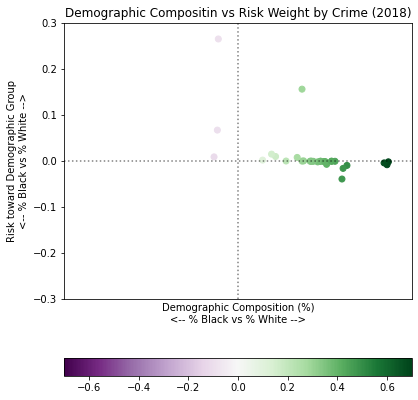

In [12]:
from matplotlib.colors import Normalize

labels = list(arrests.index)

w_x = [float(arrests.at[i, 'White'] / sum([arrests.at[i, 'White'],
                                           arrests.at[i, 'Black']])) for i in labels]
b_x = [float(arrests.at[i, 'Black'] / sum([arrests.at[i, 'White'],
                                           arrests.at[i, 'Black']])) for i in labels]
w_y = [float(deaths['White'] / arrests.at[i, 'White']) for i in labels]
b_y = [float(deaths['Black'] / arrests.at[i, 'Black']) for i in labels]

composition = [w_x[i] - b_x[i] for i in range(0, len(w_x))]
risk = [w_y[i] - b_y[i] for i in range(0, len(w_y))]

normal = Normalize(vmin=-0.7, vmax=0.7)

fig, ax = plt.subplots()
fig.set_figheight(6)
ax.set_title('Demographic Compositin vs Risk Weight by Crime (2018)')
ax.set_xlabel('Demographic Composition (%)\n<-- % Black vs % White -->')
ax.set_ylabel('Risk toward Demographic Group\n<-- % Black vs % White -->')
sc = ax.scatter(composition, risk, c=composition, norm=normal, cmap='PRGn')
ax.axhline(0, color='k', linestyle=":", alpha=0.5)
ax.axvline(0, color='k', linestyle=":", alpha=0.5)
plt.ylim([-0.3, 0.3])
plt.xlim([-0.8, 0.8])
plt.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
plt.colorbar(sc, orientation='horizontal')

plt.tight_layout()
plt.show()

Look at that stratification! 

The x-axis shows crimes based on the percentage of the demographic that were arrested for those crimes -- the far right being a majority white, the left a majority black. The y-axis is the "burden of risk" showing which demographic group has the higher risk of death for a crime -- the top being a higher risk for white people, the bottom being a higher risk for black people.

First, you'll note that a majority of all crime is perpetrated by white people (because there are more white people in the US). You'll also note what I outlined before... a majority of the risk burden is skewed toward the black population. Yes, there are **individual** crimes with higher risk burdens for white people. However, the ~60% of crime mostly perpetrated by white people have a higher risk for black people enough that black people, overall, carry the risk burden for **all** crime:

In [13]:
burden.loc[[0]]

,Offense,White,Black
0,TOTAL,0.000086,0.000108


Overall, the risk burden metric shows us that for every 100,000 arrests nearly 9 white people are killed while 11 black people are killed. **18.2% more**.

But why stop there?

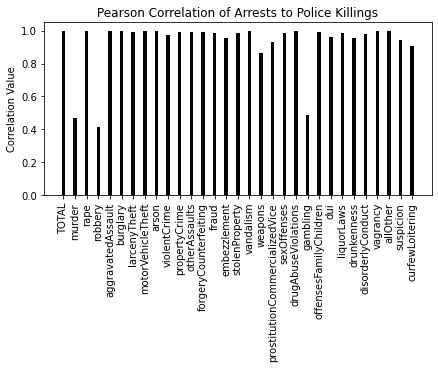

In [14]:
from scipy.stats.stats import pearsonr

labels = list(arrests.index)
headers = ['White', 'Black', 'Hispanic']

pc = []
pc_dict = {}

for i in labels:
    x = [arrests.at[i, h] for h in headers]
    y = [deaths.at[0, h] for h in headers]
    r, _ = pearsonr(x, y)
    pc.append(r)
    pc_dict[i] = r

fig_pc, a = barChart([pc], ['Correlation'], ['k'], ticks=labels, rotation=90)
_ = a.set_title('Pearson Correlation of Arrests to Police Killings')
_ = a.set_ylabel('Correlation Value')
_ = a.get_legend().remove()

vals = ['TOTAL', 'violentCrime']

Here are the correlation values between arrests and police shootings, by demographics. I included Hispanic demographic data from both original sources in order to avoid performing a correlation test on 2 data points -- but nevertheless, it should be stressed that a correlation performed on 3 data points (that is data for White, Black and Hispanic populations) cannot be considered strong. I do this for some emphasis -- chiefly, that narrowing the scope and normalizing deaths by violent crime is not the answer, nor does it give you an accurate picture. **All crime** has a higher correlation to police killings than violent crime:

In [15]:
for v in vals:
    print("{}\t{}".format(v.ljust(12, ' '), pc_dict[v]))

TOTAL       	0.9999705823786835
violentCrime	0.972084283097564


But also, remember the 3 crimes with a marginal black majority? Can you guess which ones they are from the correlation graph above (Hint: the ones with the *lowest* correlation)?

## Conclusion

The only way the risk burden is higher for white people is if you ignore all other crime, and further representative population sizes. It's a terrible metric to use. And even when you do, it doesn't adequately make the case that white people are killed disproportionately more -- it shows the opposite.